# Data Preprocessing
Set up the data so we can properly visualize it

In [7]:

#lets load in the packages that we need
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr,spearmanr
#plt.style.use('dark_background')


In [8]:
#load and check the data
df = pd.read_csv('bike_share_data.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# prepare the data by creating a month and year column and total riders columns
df['datetime'] =  pd.to_datetime(df['datetime'])
df['month'] =  df['datetime'].dt.strftime('%B')
df['year'] = df.datetime.dt.year
df['month_num'] = df['datetime'].dt.month
df['day number'] =df['datetime'].dt.dayofweek
df['day of week'] =df['datetime'].dt.strftime('%A')
df['total riders'] = df['casual'] + df['registered']
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,month_num,day number,day of week,total riders
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,January,2011,1,5,Saturday,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,January,2011,1,5,Saturday,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,January,2011,1,5,Saturday,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,January,2011,1,5,Saturday,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,January,2011,1,5,Saturday,1


In [10]:
#map the seson dictionary to the season numerical column
seasons_mapping = {1: 'winter',
                   2: 'spring',
                   3: 'summer', 
                   4: 'fall'}
df['season'] = df['season'].map(seasons_mapping)

In [11]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,month_num,day number,day of week,total riders
0,2011-01-01 00:00:00,winter,0,0,1,9.84,14.395,81,0.0,3,13,16,January,2011,1,5,Saturday,16
1,2011-01-01 01:00:00,winter,0,0,1,9.02,13.635,80,0.0,8,32,40,January,2011,1,5,Saturday,40
2,2011-01-01 02:00:00,winter,0,0,1,9.02,13.635,80,0.0,5,27,32,January,2011,1,5,Saturday,32
3,2011-01-01 03:00:00,winter,0,0,1,9.84,14.395,75,0.0,3,10,13,January,2011,1,5,Saturday,13
4,2011-01-01 04:00:00,winter,0,0,1,9.84,14.395,75,0.0,0,1,1,January,2011,1,5,Saturday,1


In [12]:
#what percent of the riders are registered
df['registered'].sum()/df['total riders'].sum()

0.811968586548107

In [13]:
#does the registered rider percentage increase by month over time?
df.groupby(['season','month',])['registered'].sum()/df.groupby('month')['total riders'].sum()

season  month    
fall    December     0.908217
        November     0.856308
        October      0.816390
spring  April        0.762171
        June         0.779942
        May          0.793727
summer  August       0.785168
        July         0.762614
        September    0.784025
winter  February     0.906198
        January      0.909218
        March        0.812316
dtype: float64

In [14]:
#what is the percent of riders by month 
df.groupby('month').sum()['total riders']/df['total riders'].sum()*100

month
April         8.027040
August       10.238238
December      7.679781
February      4.752536
January       3.830492
July         10.291032
June         10.584298
March         6.401464
May           9.597185
November      8.460419
October       9.946602
September    10.190911
Name: total riders, dtype: float64

In [15]:
#what is the percent of causual riders by month 
df.groupby('month').sum()['casual']/df['casual'].sum()*100

month
April        10.152881
August       11.697502
December      3.748709
February      2.370867
January       1.849363
July         12.992209
June         12.387061
March         6.389636
May          10.528262
November      6.465375
October       9.712726
September    11.705408
Name: casual, dtype: float64

In [16]:
# what is the percent of riders by season 
df.groupby(['season']).sum()[['total riders']]/df['total riders'].sum()

,total riders
season,
fall,0.260868
spring,0.282085
summer,0.307202
winter,0.149845


In [74]:
#Percent of registered riders on a working day
df.groupby('workingday').sum()['registered']/df['registered'].sum()

workingday
0    0.26749
1    0.73251
Name: registered, dtype: float64

In [17]:
# create a total riders columns
df = df[df['registered'] >0]
df['total riders'] = df['casual'] + df['registered']
df['hour'] =df['datetime'].dt.hour

In [18]:
#create a mean month and isolate a single year
df = df[df['year']==2011]
df['mean_month'] = df['month'].map(df.groupby('month')['total riders'].median())


In [19]:
#check out the average total riders by month 
df.groupby('month')['total riders'].mean()

month
April        111.507726
August       183.065934
December     134.173246
February      73.797753
January       54.892774
July         203.614035
June         196.877193
March         87.818594
May          174.809211
November     155.458333
October      174.773626
September    176.164811
Name: total riders, dtype: float64

In [20]:
#create a month dictionary for the visual below
month_dict = []
for i in enumerate(df['month'].unique(),1):
    month_dict.append(i)
month_dict = dict(month_dict)

# Analyze & Visualize Your Data

### Create a Ridge Plot 

C:\Users\Asus\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Asus\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Temp Distribution and Rider Aggregation')

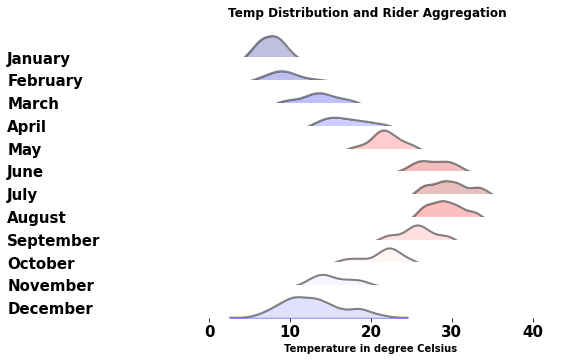

In [68]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='seismic', n_colors=12,)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df, row='month', aspect=15,height=0.4, hue='mean_month',palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'temp',fill=True, lw=1)
# adding a liner graph for the outline
g.map(sns.kdeplot, 'temp',lw=2,color='grey')


#We use the facet grid axes(g.axes.flat) and add the month as text with the right color
for i, ax in enumerate(g.axes.flat):
    ax.text(-25, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15)
    
#Lets adjust the plots so they overlap
g.fig.subplots_adjust(hspace=-0.3)

# Remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.set_xlabels("")
g.set_ylabels("")
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=10)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Temp Distribution and Rider Aggregation',fontweight='bold')


### Evaluate Correlation

In [22]:
correlations = []
def correlation_matrix(data,col1,col2,col3,col4):
    correlation1_sp =spearmanr(data[col1],data[col2])[0]
    correlation2_sp = spearmanr(data[col3],data[col4])[0]
    correlation3_sp = pearsonr(data[col1],data[col2])[0]
    correlation4_sp = pearsonr(data[col3],data[col4])[0]
    series = pd.Series({'registered (spearman)':correlation1_sp,
                        'casual (spearman)':correlation2_sp,
                        'registered (pearsonr)':correlation3_sp,
                        'casual (pearsonr)':correlation4_sp})
    return series
correlation_matrix(df,'registered','temp','casual','temp')  

registered (spearman)    0.391726
casual (spearman)        0.608284
registered (pearsonr)    0.369914
casual (pearsonr)        0.498210
dtype: float64

<AxesSubplot:>

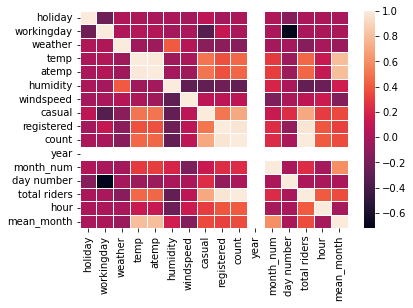

In [23]:
#create corellation plot
sns.heatmap(df.corr(),linewidths=1)

Text(0.5, 1.0, 'Overall Correlation')

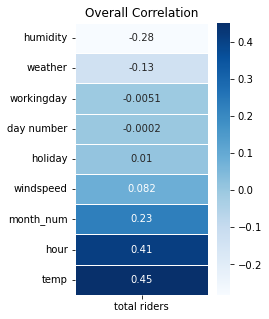

In [89]:
#lets isolate the correlation to only the riders
plt.figure(figsize=(3,5))
sns.heatmap(df.corr()[['total riders']].sort_values(by='total riders')\
            .drop(['total riders',
                   'count',
                   'mean_month',
                   'atemp',
                   'registered','casual','year']),linewidths=1,annot=True, cmap='Blues')
plt.title('Overall Correlation')

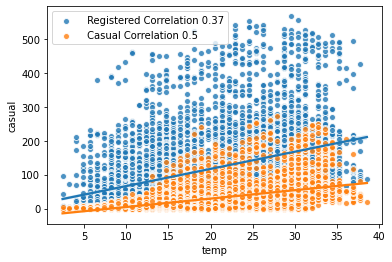

In [25]:
#lets create a scatter plot with both rider types and the correlation
r_corr =round(pearsonr(df['temp'],df['registered'])[0],2)
c_corr = round(pearsonr(df['temp'],df['casual'])[0],2)
sns.regplot(data=df,x='temp',y='registered',scatter_kws={'edgecolor':'white'},label=f' Registered Correlation {r_corr}')
sns.regplot(data=df,x='temp',y='casual',scatter_kws={'edgecolor':'white'},label=f' Casual Correlation {c_corr}')
plt.legend()

Text(0.5, 1.0, 'Registered')

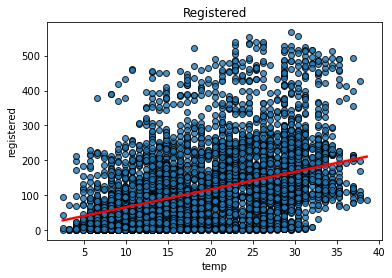

In [82]:
sns.regplot(data=df,x='temp',y='registered',scatter_kws={'edgecolor':'black'},
            label=f' Registered Correlation {r_corr}',
           line_kws={'color':'red'})
plt.title('Registered')

Text(0.5, 1.0, 'Casual')

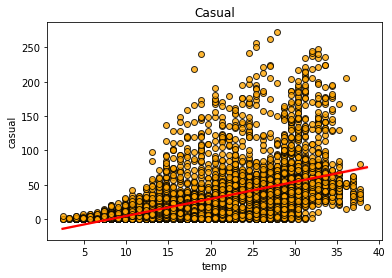

In [83]:
sns.regplot(data=df,x='temp',y='casual',scatter_kws={'edgecolor':'black'},
            label=f' Casual Correlation {c_corr}',
            color='orange',
            line_kws={'color':'red'})
plt.title('Casual')

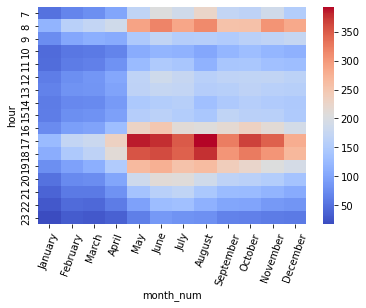

In [51]:
#lets create a heatmap  of the hour and months to see how riders are affected. 
ax =sns.heatmap(pd.pivot_table(data=df[df['hour']>6],
                           index='hour',
                           columns='month_num',
                           values='registered',
                           aggfunc='mean'),cmap='coolwarm')
ax.set_xticklabels(df.month.unique())
plt.xticks(rotation=70);

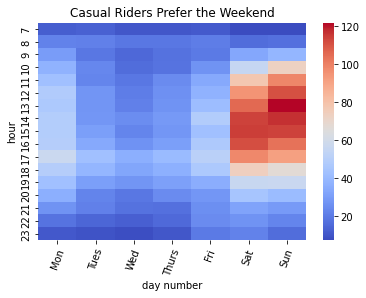

In [61]:
#lets create a heatmap  of the hour and day of week to see how riders are affected. 
ax = sns.heatmap(pd.pivot_table(data=df[df['hour']>6],
                           index='hour',
                           columns='day number',
                           values='casual',aggfunc='mean'),
                           cmap='coolwarm')
ax.set_xticklabels(['Mon', 'Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.xticks(rotation=70)
plt.title('Casual Riders Prefer the Weekend');

In [36]:
df.groupby('day of week').sum()['casual']/df['casual'].sum()

day of week
Friday       0.122895
Monday       0.135039
Saturday     0.246284
Sunday       0.242054
Thursday     0.086115
Tuesday      0.093278
Wednesday    0.074336
Name: casual, dtype: float64

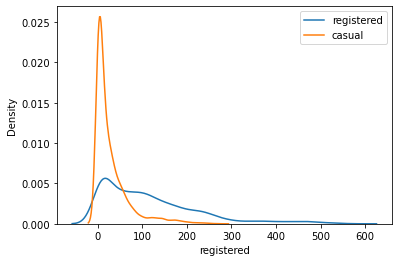

In [28]:
sns.kdeplot(df['registered'],label='registered')
sns.kdeplot(df['casual'],label='casual')
plt.legend()

In [29]:
df['Temp Buckets'] =  pd.qcut(df['temp'],4)

In [30]:
df['Temp Buckets'].value_counts()

(19.68, 26.24]    1409
(2.459, 13.12]    1387
(13.12, 19.68]    1341
(26.24, 38.54]    1270
Name: Temp Buckets, dtype: int64

In [31]:
grouping = df.groupby('Temp Buckets').mean()[['casual','registered','total riders']]
grouping['Difference'] =  grouping['registered']/grouping['casual']
grouping

,casual,registered,total riders,Difference
Temp Buckets,,,,
"(2.459, 13.12]",5.594088,66.532805,72.126893,11.893414
"(13.12, 19.68]",20.045488,98.758389,118.803878,4.926714
"(19.68, 26.24]",32.829666,130.836054,163.665720,3.985300
"(26.24, 38.54]",58.972441,170.943307,229.915748,2.898698


<AxesSubplot:title={'center':'Exponential Change in Riders By Temp Group'}, xlabel='Temp Buckets', ylabel='Difference'>

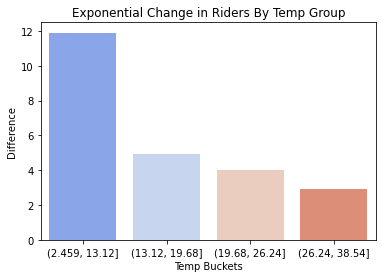

In [32]:
plt.title('Exponential Change in Riders By Temp Group')
sns.barplot(data = grouping, x=grouping.index, y='Difference',palette='coolwarm')